This notebook will mainly be used for the capstone project.

# Introduction/Business Understanding
Using the collision data provided by Coursera, I wanted to look into how the type of collision impacts the severity of the incident. What types of car crashes are most likely to result in injury? Knowing this information will inform city officials the type of accident they should take steps to reduce.

# Data Understanding
In the data, there are two key attributes: SEVERITYCODE, which describes the severity of a crash, and COLLISIONTYPE, which describes the type of crash. Other attributes that I will consider but are not crucial are the WEATHER, ROADCOND, LIGHTCOND, INATTENTIONIND, UNDERINFL

# Data Preparation and Cleaning
I should drop the attributes I don't need from the table. INCKEY, COLDETKEY, REPORTNO, STATUS, ADDRTYPE, INTKEY, LOCATION, EXCEPTRSNCODE, EXCEPTRSNDESC, SEVERITYCODE, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, INCDATE, INCDTTM, JUNCTIONTYPE, SDOT_COLCODE, SDOT_COLDESC, PEDROWNOTGRNT, SDOTCOLNUM, ST_COLCODE, ST_COLDESC, SEGLANEKEY, CROSSWALKKEY, and HITPARKEDCAR are all candidates to be dropped.

# Modeling
How will I model this data? First, I will find a pattern in the accidents using more data visualization to find the connections on WEATHER, ROADCOND, LIGHTCOND, INATTENTIONIND, and UNDERINFL on the severity of car crashes. After I visualize that data, I will run a statistical analysis on what accidents are more likely to result in injury.

# Evaluation
SEVERITYCODE is either 1, no injury, or 2, injury. I want to create graphs of COLLISIONTYPE, WEATHER, ROADCOND, LIGHTCOND, INATTENTIONIND, and UNDERINFL compared to their SEVERITYDESC. 

# Deployment

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.dtypes # datatypes

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df['SEVERITYDESC'].value_counts().to_frame() # choosing columns for the filtered dataframe

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


In [5]:
df['COLLISIONTYPE'].value_counts().to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


In [6]:
df['WEATHER'].value_counts().to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [7]:
df['ROADCOND'].value_counts().to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [8]:
df['LIGHTCOND'].value_counts().to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [9]:
df['INATTENTIONIND'].value_counts().to_frame()

,INATTENTIONIND
Y,29805


In [10]:
df['UNDERINFL'].value_counts().to_frame()

,UNDERINFL
N,100274
0,80394
Y,5126
1,3995


In [11]:
df_Conditions = df.filter(['SEVERITYCODE', 'COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'INATTENTIONIND', 'UNDERINFL'], axis = 1) # filtered dataframe
df_Conditions.head()

,SEVERITYCODE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,UNDERINFL
0,2,Angles,Overcast,Wet,Daylight,NaN,N
1,1,Sideswipe,Raining,Wet,Dark - Street Lights On,NaN,0
2,1,Parked Car,Overcast,Dry,Daylight,NaN,0
3,1,Other,Clear,Dry,Daylight,NaN,N
4,2,Angles,Raining,Wet,Daylight,NaN,0


In [12]:
df_Conditions['UNDERINFL'].replace({"N" : "0", "Y" : "1"}, inplace = True) # replacing Y and N with 1 and 0
df_Conditions.tail(10)

,SEVERITYCODE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,UNDERINFL
194663,2,Angles,Raining,Wet,Daylight,Y,0
194664,1,Angles,Clear,Dry,Daylight,NaN,0
194665,1,Angles,Clear,Dry,Daylight,NaN,0
194666,2,Angles,Clear,Wet,Daylight,NaN,0
194667,1,Other,Raining,Wet,Dark - Street Lights On,NaN,1
194668,2,Head On,Clear,Dry,Daylight,NaN,0
194669,1,Rear Ended,Raining,Wet,Daylight,Y,0
194670,2,Left Turn,Clear,Dry,Daylight,NaN,0
194671,2,Cycles,Clear,Dry,Dusk,NaN,0
194672,1,Rear Ended,Clear,Wet,Daylight,NaN,0


In [13]:
import matplotlib.pyplot as plt # need this library to make bar charts

In [14]:
df_Severity = df_Conditions['SEVERITYCODE'].value_counts().to_frame()
df_Severity

,SEVERITYCODE
1,136485
2,58188


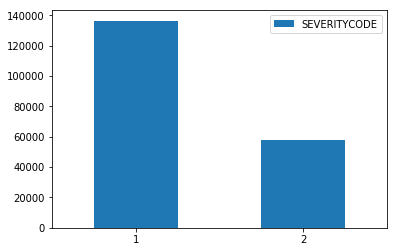

In [15]:
ax = df_Severity.plot.bar(y = 'SEVERITYCODE', rot = 0) # number of noninjury collisions vs injury collisions

In [16]:
from sklearn.utils import resample

In [17]:
df_Conditions_maj = df_Conditions[df_Conditions.SEVERITYCODE == 1]
df_Conditions_min = df_Conditions[df_Conditions.SEVERITYCODE == 2]

df_Conditions_maj_dsample = resample(df_Conditions_maj,
                                    replace = False,
                                    n_samples = 58188,
                                    random_state = 123)

df_Conditions_balanced = pd.concat([df_Conditions_maj_dsample, df_Conditions_min])

df_Conditions_balanced.SEVERITYCODE.value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

In [18]:
df_Conditions_balanced.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize = True) # types of collisions and how many of those types of collisions result in injury

COLLISIONTYPE  SEVERITYCODE
Angles         2               0.603954
               1               0.396046
Cycles         2               0.947095
               1               0.052905
Head On        2               0.631427
               1               0.368573
Left Turn      2               0.605460
               1               0.394540
Other          1               0.552824
               2               0.447176
Parked Car     1               0.878829
               2               0.121171
Pedestrian     2               0.952962
               1               0.047038
Rear Ended     2               0.640543
               1               0.359457
Right Turn     1               0.621269
               2               0.378731
Sideswipe      1               0.733489
               2               0.266511
Name: SEVERITYCODE, dtype: float64

In [19]:
df_Conditions_balanced.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize = True) # weather conditions at time of collision and how severe they are

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.500000
                          2               0.500000
Clear                     2               0.527478
                          1               0.472522
Fog/Smog/Smoke            2               0.526761
                          1               0.473239
Other                     1               0.714286
                          2               0.285714
Overcast                  2               0.519484
                          1               0.480516
Partly Cloudy             2               0.750000
                          1               0.250000
Raining                   2               0.542946
                          1               0.457054
Severe Crosswind          2               0.538462
                          1               0.461538
Sleet/Hail/Freezing Rain  1               0.555556
                          2               0.444444
Snowing                   1               0

In [20]:
df_Conditions_balanced.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize = True) # road conditions at time of collision and how severe they are

ROADCOND        SEVERITYCODE
Dry             2               0.527158
                1               0.472842
Ice             1               0.597345
                2               0.402655
Oil             2               0.615385
                1               0.384615
Other           2               0.518072
                1               0.481928
Sand/Mud/Dirt   1               0.510638
                2               0.489362
Snow/Slush      1               0.683712
                2               0.316288
Standing Water  2               0.526316
                1               0.473684
Unknown         1               0.889950
                2               0.110050
Wet             2               0.536359
                1               0.463641
Name: SEVERITYCODE, dtype: float64

In [21]:
df_Conditions_balanced.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize = True) # light conditions at time of collision and how severe they are

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.614319
                          2               0.385681
Dark - Street Lights Off  1               0.550498
                          2               0.449502
Dark - Street Lights On   1               0.503141
                          2               0.496859
Dark - Unknown Lighting   2               0.571429
                          1               0.428571
Dawn                      2               0.536808
                          1               0.463192
Daylight                  2               0.539054
                          1               0.460946
Dusk                      2               0.541203
                          1               0.458797
Other                     1               0.590551
                          2               0.409449
Unknown                   1               0.900198
                          2               0.099802
Name: SEVERITYCODE, dtype: float64

In [22]:
df_Conditions_balanced['INATTENTIONIND'].replace({"NaN" : "0", "Y" : "1"}, inplace = True) # filling in the INATTENTIONIND column with 1s and 0s
df_Conditions_balanced['INATTENTIONIND'] = df_Conditions_balanced['INATTENTIONIND'].fillna(0)
df_Conditions_balanced['INATTENTIONIND'].head(50)

25055     0
65280     0
86292     0
155111    0
64598     0
119954    0
64063     0
105379    0
181211    0
187708    0
63021     0
156744    0
10240     1
37311     0
108465    0
97400     0
51928     0
7574      0
135430    0
64620     0
160199    0
169301    0
120192    0
158305    0
179658    0
67340     0
184250    0
57004     0
49555     1
74905     0
187234    0
72868     0
21603     0
124475    0
126701    0
28330     0
166565    0
171070    0
184745    0
103545    0
115256    0
182608    0
75179     0
73197     0
97883     1
55463     0
32837     0
57136     0
4657      1
122832    0
Name: INATTENTIONIND, dtype: object

In [23]:
df_Conditions_balanced.groupby(['INATTENTIONIND'])['SEVERITYCODE'].value_counts(normalize = True) # inattention at time of collision and how severe they are

INATTENTIONIND  SEVERITYCODE
0               1               0.510924
                2               0.489076
1               2               0.557211
                1               0.442789
Name: SEVERITYCODE, dtype: float64

In [24]:
df_Conditions_balanced.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize = True) # under influence at time of collision and how severe they are

UNDERINFL  SEVERITYCODE
0          1               0.502326
           2               0.497674
1          2               0.594856
           1               0.405144
Name: SEVERITYCODE, dtype: float64

In [25]:
df_Conditions_balanced.head()

,SEVERITYCODE,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND,UNDERINFL
25055,1,Angles,Raining,Wet,Dark - Street Lights On,0,0
65280,1,Angles,Clear,Dry,Daylight,0,0
86292,1,Angles,Unknown,Unknown,Unknown,0,0
155111,1,Sideswipe,Clear,Dry,Daylight,0,0
64598,1,Head On,Clear,Dry,Daylight,0,0


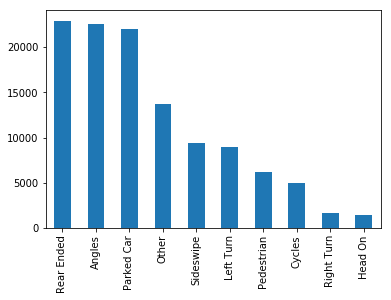

In [29]:
df_Conditions_balanced['COLLISIONTYPE'].value_counts().plot(kind = 'bar')

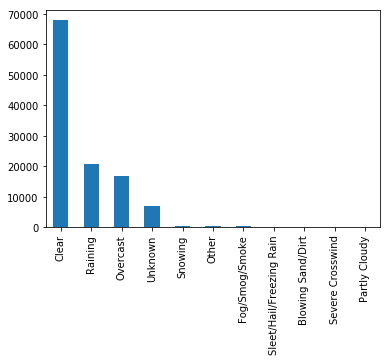

In [30]:
df_Conditions_balanced['WEATHER'].value_counts().plot(kind = 'bar')

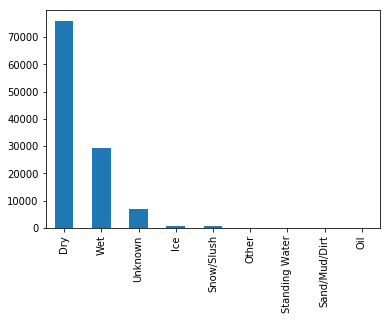

In [31]:
df_Conditions_balanced['ROADCOND'].value_counts().plot(kind = 'bar')

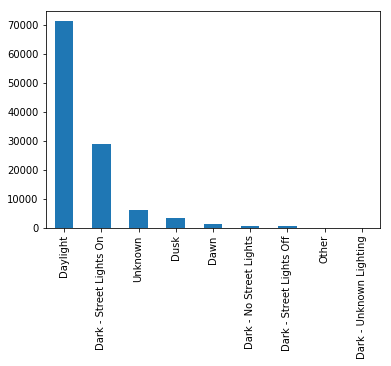

In [32]:
df_Conditions_balanced['LIGHTCOND'].value_counts().plot(kind = 'bar')

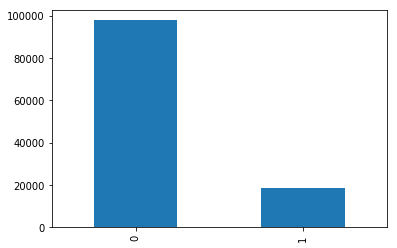

In [34]:
df_Conditions_balanced['INATTENTIONIND'].value_counts().plot(kind = 'bar')

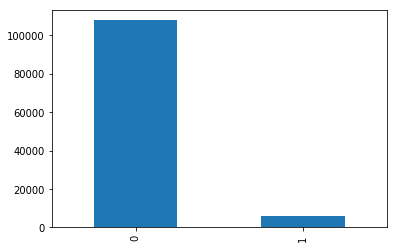

In [35]:
df_Conditions_balanced['UNDERINFL'].value_counts().plot(kind = 'bar')